![example](images/director_shot.jpeg)

# Project Title

**Author:** Austin Towery
***

## Overview

This analysis focuses on how a company might start getting into making movies and which areas of the industry to focus on.  The analysis shows promising options that are not risky in which genres to focus on.  It also demonstrates some interesting data about how important audience engagement is or is not.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. The goal of this analysis is to explore what factors can contribute to success or failure when making movies. Using that analysis I will translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what movies to create.
***
I picked the questions I did because I think they will provide solid advice on how to enter the industry without taking too much risk.  The benefit to this approach is that is allows for growth in the future without hurting yourself in the present.

## Data Understanding
**The datasets that I use in this analysis are from IMDB, The Numbers, and The Movie DB(TMDB).  These are all websites that have a long history of providing extensive data on movies and the movie industry.  Each of these sources provide information such as gross earnings, genre, cast and crew, production and release dates, consumer ratings, and much more about millions of movies and tv shows.**

* [IMDB](https://www.imdb.com/) has been around since 1990 and is one of the most popular and respected database of movie and tv information. 
* [The Numbers](https://www.the-numbers.com/) is an online source for data on the movie industry that is offered for free by it's owner Nash Information LLC.  Nash Information have been providing reliable data development and modeling for dta analysis companies for almost 20 years.
* [TMDB](https://www.themoviedb.org/about) is a community built movie and tv database.  It has been fostering a community and building it's database since 2008.  
***

In [2]:
# # Import standard packages
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# %matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os,glob
import string
%matplotlib inline

### Import Data

- There is a lot of information spread out over the various data sources.


- To see what the best option will be I create an easier to work with version of all the file names.


- Then I create a dictionary where each csv file is imported as a a key and it corresponds to the files dataset already as a dataframe.  


- The keys are the cleaned file names and one corresponds to a value that has the table's data.

In [4]:
# Create folder for data files
folder = 'zippedData/'

# use os to list files in folder
os.listdir(folder)

# Glob is creating a search string that searches in folder for any file type 
# That starts with csv but can have anything after

files = glob.glob(f"{folder}*.csv*")

# Make file names more variable friendly
# Take file name, replace .csv.gz, split it along slashes, then take the last
# Item after split and swap '.' for '_'

files[0].replace('zippedData\\','').replace('.csv.gz','').split(
                                        '/')[-1].replace('.','_')
# code by James Irving, retrieved 09/14/2021
# Source: https://youtu.be/rufvTgBEYN8?list=PLQp1KyYFwVkYidKxcOrKHvRuVtUOc4W2h&t=1336

'bom_movie_gross'

In [5]:
#Load files into dict using filename as their key
tables = {}
dashes = '---'*25

for file in files:
    # Save a variable-friendly version of file name
    table_name = file.replace('zippedData\\',''
                             ).replace('.csv.gz',''
                             ).split('/')[-1].replace('.','_')
    print(dashes)
    
    # Load and preview dataframe
    print(f'Preview of {table_name}')
    tables[table_name] = pd.read_csv(file)
    display(tables[table_name].head(5))
    print()
      
# code by James Irving, retrieved 09/14/2021
# Source: https://youtu.be/rufvTgBEYN8?list=PLQp1KyYFwVkYidKxcOrKHvRuVtUOc4W2h&t=1336

---------------------------------------------------------------------------
Preview of bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



---------------------------------------------------------------------------
Preview of imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"



---------------------------------------------------------------------------
Preview of imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0



---------------------------------------------------------------------------
Preview of imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"



---------------------------------------------------------------------------
Preview of imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943



---------------------------------------------------------------------------
Preview of imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"



---------------------------------------------------------------------------
Preview of imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21



---------------------------------------------------------------------------
Preview of tmdb_movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186



---------------------------------------------------------------------------
Preview of tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Showcase and Explanation for which data was chosen

**Based on the available information from each dataset, The ones I will use for analysis are:**
- `imdb_title_basics`
- `imdb_title_ratings`
- `tn_movie_budgets`
- `tmdb_movies`
***
> IMDB's dataset contains the runtime and genre's associated with movie titles and it has over 140,000 entries so it should provide an acceptable amount of data even after losing some data in joins and cleaning.  The second IMDB dataset has information about user rating of each movie.

> TN's dataset provides the movie's gross earnings, domestic and worldwide, as well as the production budget.  This data is used to investigate the financial metric of the analysis.

> TMDB's dataset has data on 1-10 rating given by users, the total votes for each movie, and a popularity metric.  This data is used to investigate the audience approval metric of the analysis. 

In [6]:
# create dataframe for each dataset that will be used and print the info for it
# print dashes for readability after each output

df_imdb_title_basics = tables['imdb_title_basics']
print(df_imdb_title_basics.info())

print(dashes)

df_imdb_title_ratings = tables['imdb_title_ratings']
print(df_imdb_title_ratings.info())

print(dashes)

df_tn_movie_budgets = tables['tn_movie_budgets']
print(df_tn_movie_budgets.info())

print(dashes)

df_tmdb_movies = tables['tmdb_movies']
print(df_tmdb_movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
mem

#### IMDB Title Basics and Ratings

In [7]:
# merge both imdb datasets on their common key
df_imdb_merged = df_imdb_title_basics.merge(df_imdb_title_ratings, 
                                              how='inner', on='tconst')

# rename new columns to specificy they are from the imdb ratings
df_imdb_merged.rename(columns={'averagerating': 'imdb_average_rating', 
                               'numvotes': 'imdb_num_votes'}, inplace=True)

# create copy of merged imdb dataset 
df_imdb_exploded = df_imdb_merged

# create new column Genres and set it equal to a list of words in genre column
df_imdb_exploded['Genres'] = df_imdb_exploded['genres'].str.split(',')

# for titles with multiple genres, create new row with a copy of the movie's 
# information for each genre they are associated with
df_imdb_exploded = df_imdb_exploded.explode('Genres')

# preview dataframe
display(df_imdb_exploded.head(3))

# display how many of movies have the associated genre tag
df_imdb_exploded['Genres'].value_counts()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,imdb_average_rating,imdb_num_votes,Genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Drama


Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: Genres, dtype: int64

In [8]:
# returns the mean of each column, groupby Genres to show average value for 
# each genre, sort by average rating with highest first, drop start year
# column since it isn't relavent
df_imdb_exploded.groupby('Genres').mean().sort_values('imdb_average_rating', 
                                                      ascending=False).drop(
                                                        'start_year', axis=1)

,runtime_minutes,imdb_average_rating,imdb_num_votes
Genres,,,
Short,18.000000,8.800000,8.000000
Documentary,85.766303,7.332090,266.960232
Game-Show,117.000000,7.300000,1734.500000
News,78.271304,7.271330,212.986183
Biography,90.832927,7.162274,5673.259648
Music,93.228308,7.091972,2771.020833
History,92.605030,7.040956,2776.406726
Sport,92.182894,6.961493,3185.601357
War,97.011321,6.584291,3147.391559


#### TN Movie Budgets

In [9]:
# created function to clean dollar value strings and prepare to convert to int
def clean_dollar_amount(column):
    column = column.map(lambda x: x.replace(',', ''))
    column = column.map(lambda x: x.replace('$', ''))
    return column

In [10]:
# use function to clean column values
df_tn_movie_budgets['worldwide_gross'] = clean_dollar_amount(
                            df_tn_movie_budgets['worldwide_gross'])

# use function to clean column values
df_tn_movie_budgets['domestic_gross'] = clean_dollar_amount(
                            df_tn_movie_budgets['domestic_gross'])

# use function to clean column values
df_tn_movie_budgets['production_budget'] = clean_dollar_amount(
                            df_tn_movie_budgets['production_budget'])

df_tn_movie_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875


In [11]:
# convert column to int with cleaned values
df_tn_movie_budgets = df_tn_movie_budgets.astype({'worldwide_gross': 'int64'})

# convert column to int with cleaned values
df_tn_movie_budgets = df_tn_movie_budgets.astype({'domestic_gross': 'int64'})

# convert column to int with cleaned values
df_tn_movie_budgets = df_tn_movie_budgets.astype({'production_budget': 'int64'})

df_tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [12]:
# function to help with readability of numbers
def truncate(number):
    if type(number) == int:
        nn = number / 1000000
        return nn

# create new df so I don't modify the original 
df = df_tn_movie_budgets.drop(['id'], axis=1)

# create profit column and set equal to worldwide_gross minus production_budget
df['profit'] = df['worldwide_gross'] - df['production_budget']

# apply truncate function to every cell in new df
df = df.applymap(truncate)

# print the units of each amount for reference
print('Values Displayed in Millions of Dollars')
# display statistical information about columns and skip extraneous count row
df.describe().iloc[1:]

Values Displayed in Millions of Dollars


,production_budget,domestic_gross,worldwide_gross,profit
mean,31.587757,41.873327,91.487461,59.899704
std,41.812077,68.240597,174.719969,146.088881
min,0.001100,0.000000,0.000000,-200.237650
25%,5.000000,1.429534,4.125415,-2.189071
50%,17.000000,17.225945,27.984448,8.550286
75%,40.000000,52.348662,97.645837,60.968502
max,425.000000,936.662225,2776.345279,2351.345279


## Data Preparation

For the `tmdb_movies` and the `tn_movie_budgets` the best option to join was with movie titles.  However the titles were formatted differently in each table and some had misread punctuation as unicode.
***
- I normalized the titles in each table as much as possible by making them all lower case and removing any excess spacing and punctuation.
- To fix the unicode artifacts I created a unique list of the ones that appeared in the titles.  Then replaced each one with the correct value if I could confirm what it was.
- There were only a small amount left over and they did not match any titles in the `imdb` dataframe I would be merging to so I dropped them.
***
- After merging there were some null values in the runtime but it was small enough that dropping is ok.
- There were also duplicate movies added that could skew the results so I dropped the duplicated movies to be safe.


### Data Cleaning

In [13]:
# display both dataframes I still need to merge
display(df_tn_movie_budgets.head(1))
display(df_tmdb_movies.head(1))

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


> The IMDB datasets were merged on their primary key in the data understanding section.  But the TN and TMDB datasets will need to be to be merged on the movie titles.

> I will format the movie title columns for the dataset to be as similar as possible and then merge them.

In [14]:
# takes in a string and removes punctuation, extra spaces, and returns 
# cleaned string
def clean_title(text):
    import string
    # remove punctuation
    for p in string.punctuation:
        text = text.replace(p,'')
    
    # remove extra spaces, make lower case, creat list of each word in string
    text_list = text.strip().lower().split()
    # join each word in text_list together with a space in between to remake string
    new_text = ' '.join(text_list)
    
    return new_text

# takes in a list and uses the clean_title function to clean each item
def clean_title_list(title_list):
    cleaned_list = []
    
    for title in title_list:
        title = clean_title(title)
        cleaned_list.append(title)
        
    return cleaned_list

In [15]:
# use function to clean titles in each dataframe

df_tmdb_movies['original_title'] = clean_title_list(df_tmdb_movies['original_title'])
df_imdb_merged['original_title'] = clean_title_list(df_imdb_merged['original_title'])
df_imdb_merged['primary_title'] = clean_title_list(df_imdb_merged['primary_title'])
df_tn_movie_budgets['movie'] = clean_title_list(df_tn_movie_budgets['movie'])

> First I will create a function to clean the titles and then I will see what the ones that still won't match look like.

In [16]:
# create list to hold the titles not found for further review
not_found = []

# check each title in title_list to see if it matches one of the titles 
# in either of imdb_title_basics columns  dataset
for title in df_tn_movie_budgets['movie']:
    # if not found in either imdb title lists add title to list to not found
    if title.lower() not in df_imdb_title_basics['primary_title']:
        if title.lower() not in df_imdb_title_basics['original_title']:
            not_found.append(title.lower())
            
print(not_found[:10])

['avatar', 'pirates of the caribbean on stranger tides', 'dark phoenix', 'avengers age of ultron', 'star wars ep viii the last jedi', 'star wars ep vii the force awakens', 'avengers infinity war', 'pirates of the caribbean at worldâ\x80\x99s end', 'justice league', 'spectre']


> There are some artifacts in some of the titles that look like unicode.

In [17]:
# make a list of all titles containing text artifact
misread_titles = []
for title in not_found:
    if "â" in title:
        misread_titles.append(title)

unwanted_text_variants = []
# create unique set of artifact variants using misread_titles

for title in misread_titles:
    # partition title at beginning of artifact text
    part_title = title.partition('â')
    
    # split last element of partition and select the first element
    split_part = part_title[-1].split()[0]
    
    # add 'â' back to artifact and append to unwanted variants list
    artifact = 'â' + split_part
    unwanted_text_variants.append(artifact)
    
# create unique list with one of each type of variant found 
unwanted_set = set(unwanted_text_variants)
unwanted_set

{'â\x80\x93',
 'â\x80\x94',
 'â\x80\x94fallout',
 'â\x80\x94ghost',
 'â\x80\x94rogue',
 'â\x80\x99',
 'â\x80\x99amore',
 'â\x80\x99m',
 'â\x80\x99os',
 'â\x80\x99s',
 'â\x80\x99t',
 'â\x80¦',
 'â\x80¦loaded',
 'âº',
 'â½'}

> After seeing the specific artifacts most of them can be fixed by replacing them with their unicode counterpart.

In [18]:
# makes a list of titles containing an artifact who's value is unclear and can't be replaced
def artifact_list(title_list):
    misc_artifacts = []
    for title in misread_titles:
        if 'â\x80¦' in title:
            misc_artifacts.append(title)
            
    return misc_artifacts

# if input text contains an artifact, replace the artifact with correct puncuation
def replace_artifact(text):
    if 'â\x80\x93' in text:
        text = text.replace('â\x80\x93', "-")   
    elif 'â\x80\x94' in text:
        text = text.replace('â\x80\x94', "-")
    elif 'â\x80\x99' in text:
        text = text.replace('â\x80\x99', "'") 
    elif 'âº' in text:
        text = text.replace('âº', '')
    elif 'â½' in text:
        text = text.replace('â½', '') 
    return text

# takes in a list of titles and corrects any artifacts in them
def fix_artifact_titles(title_list):
    
    fixed_titles = []
    
    # creates a list of titles with misc artifacts that can't be replaced
    misc_artifacts = artifact_list(title_list)
    
    
    for title in title_list:
        
        # if â is in the title, check if title is in misc artifacts
        # if it is then append to fixed titles
        if 'â' in title:
            if title in misc_artifacts:
                fixed_titles.append(title)
            # fix title with replace artifact function, append fixed title
            else:
                rep_title = replace_artifact(title)
                fixed_titles.append(rep_title)
        # if none of that append title to fixed titles
        else:
            fixed_titles.append(title)
    
    return fixed_titles

# use function to finish cleaning TN and TMDB title lists
df_tn_movie_budgets['movie'] = fix_artifact_titles(df_tn_movie_budgets['movie'])
df_tmdb_movies['original_title'] = fix_artifact_titles(df_tmdb_movies['original_title'])

> Doing each of these as an inner join gives us the highest amount of results possible since it uses the keys from both dataframes being merged.  



### Merging Dataframes

In [19]:
# change column name so that the two dataframes can be merged with movie titles
df_to_merge = df_imdb_merged.rename(columns={'primary_title': 'movie'})

# merge data frames on column 'movie'
df_imdb_tn = df_tn_movie_budgets.merge(df_to_merge, how='inner', on='movie')

# merge imdb and tn dataframe with tmdb on original_title
df_final = df_imdb_tn.merge(df_tmdb_movies, how='inner', on='original_title')
df_final.head(1)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,...,Genres,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count
0,2,"May 20, 2011",pirates of the caribbean on stranger tides,410600000,241063875,1045663875,tt1298650,pirates of the caribbean on stranger tides,2011,136.0,...,"[Action, Adventure, Fantasy]",2470,"[12, 28, 14]",1865,en,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571


In [20]:
# drop all extra columns from merges
df_final = df_final.drop(['id_x', 'release_date_x', 'tconst', 'original_title', 
                    'start_year', 'Unnamed: 0', 'genre_ids', 'id_y', 
                    'original_language', 'release_date_y', 'title'], axis=1)

# rename tmdb's ratings for clarity
df_final.rename(columns={'vote_average': 'tmdb_avg_rating', 
                   'vote_count': 'tmdb_vote_count'}, inplace=True)
df_final.head(1)

,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,imdb_average_rating,imdb_num_votes,Genres,popularity,tmdb_avg_rating,tmdb_vote_count
0,pirates of the caribbean on stranger tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",6.6,447624,"[Action, Adventure, Fantasy]",30.579,6.4,8571


In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3093 entries, 0 to 3092
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie                3093 non-null   object 
 1   production_budget    3093 non-null   int64  
 2   domestic_gross       3093 non-null   int64  
 3   worldwide_gross      3093 non-null   int64  
 4   runtime_minutes      2989 non-null   float64
 5   genres               3085 non-null   object 
 6   imdb_average_rating  3093 non-null   float64
 7   imdb_num_votes       3093 non-null   int64  
 8   Genres               3085 non-null   object 
 9   popularity           3093 non-null   float64
 10  tmdb_avg_rating      3093 non-null   float64
 11  tmdb_vote_count      3093 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 314.1+ KB


In [22]:
# create profit column for worldwide gross - production budget
df_final['profit'] = df_final['worldwide_gross'] - df_final['production_budget']
# create return on investment column for worldwide gross
df_final['WW_ROI'] = (df_final['worldwide_gross'] - df_final['production_budget']
                ) / df_final['production_budget']

In [23]:
# display amount of null values for each column now
print(df_final.isna().sum())
# display any duplicates of movies
df_final.duplicated(subset=['movie']).sum()

movie                    0
production_budget        0
domestic_gross           0
worldwide_gross          0
runtime_minutes        104
genres                   8
imdb_average_rating      0
imdb_num_votes           0
Genres                   8
popularity               0
tmdb_avg_rating          0
tmdb_vote_count          0
profit                   0
WW_ROI                   0
dtype: int64


1272

In [24]:
# drop rows with null values
df_final = df_final.dropna(how='any')
# drop duplicates
df_final.drop_duplicates(subset=['movie'], inplace=True)

# drop any columns with 0 values for grosses or budget
df_final = df_final[df_final['production_budget'] != 0]
df_final = df_final[df_final['worldwide_gross'] != 0]
df_final = df_final[df_final['domestic_gross'] != 0]

## Data Modeling
**Genre Modeling**
- The goal was to compare how each genre performed financially since that felt like the logical place to start. 
- When starting a movie company cost is going to be a big concern as you learn what works.  The data does show quite a large margin between the highest few genres and the rest.

***
**Movie Runtime Modeling**
- The first metric to use here is also financial but instead of profit I chose just gross.
- The question I want to answer is does the runtime effect the money the public spends to see it.  This isn't impacted by costs or other factors.
- This question is of course more complicated than money spent but this is a good place to start to look for information.
- The second metric I will use is audience votes about the movie.
- Future analysis show important time frames that are specific to genres or just in different parts of the world.
***
**Audience Rating Modeling**
- I provide a graph for popularity and user rating against overall gross of those movies.

### Genre Modeling
- I created a column `Genres` and set it equal to a list of the genres associated with that movie.
- Using the explode method I created a seperate row for a movie for each genre it was in.  This allowed me to perform aggregations on the dataframe and then groupby genre to get those values for each genre.
- Finally I have the graphs of the total worldwide grosses per genre and the total profit per genre.

In [25]:
# for titles with multiple genres, create new row with the title and each genre 
# associated with it
df_exploded = df.explode('Genres')

KeyError: 'Genres'

In [ ]:
# sum the values of each column in the explode df and group it by Genres
# to show the sum of each column for broken down by genre
df_exp_sum = df_exploded.groupby('Genres').sum().sort_values(
    'worldwide_gross', ascending=False)

# reduce columns to the ones important to this analysis
df_trunc_sum = df_exp_sum[['production_budget', 'domestic_gross', 
                            'worldwide_gross', 'profit']]

# sort the dataframe by the new column each time and print the top three
# genres for each column
for column in df_trunc_sum.columns:
    
    df = df_trunc.sort_values(column, ascending=False)
    
    # assign top three genres to genre1,2,3
    genre1 = df.index[0]
    genre2 = df.index[1]
    genre3 = df.index[2]
    
    # assign top three values to value1,2,3
    value1 = round(df[column][0] / 1000000000)
    value2 = round(df[column][1] / 1000000000)
    value3 = round(df[column][2] / 1000000000)
    
    # print results rounded so the number that shows is that many billion
    print(f'The three highest genres in for {column} are:')
    print(f'{genre1}: {value1} B')
    print(f'{genre2}: {value2} B')
    print(f'{genre3}: {value3} B')
    
    print(dashes)

In [ ]:
# sum the values of each column in the explode df and group it by Genres
# to show the mean of each column for broken down by genre
df_exp_mean = df_exploded.groupby('Genres').mean().sort_values(
    'worldwide_gross', ascending=False)

# reduce columns to the ones important to this analysis
df_trunc_mean = df_exp_mean[['production_budget', 'domestic_gross', 
                            'worldwide_gross', 'profit']]

# sort the dataframe by the new column each time and print the top three
# genres for each column
for column in df_trunc_mean.columns:
    
    df = df_trunc_mean.sort_values(column, ascending=False)
    
    # assign top three genres to genre1,2,3  
    genre1 = df.index[0]
    genre2 = df.index[1]
    genre3 = df.index[2]
    
    # assign top three values to value1,2,3
    value1 = round(df[column][0] / 1000000)
    value2 = round(df[column][1] / 1000000)
    value3 = round(df[column][2] / 1000000)
    
    # print results rounded so the number that shows is that many million
    print(f'The three highest genres in for {column} are:')
    print(f'{genre1}: {value1} M')
    print(f'{genre2}: {value2} M')
    print(f'{genre3}: {value3} M')
    
    print(dashes)

> In both the total gross(sum) and the average gross Adventure is at or near the top.  This is going to be partially skewed by it being a common genre type. Unlike some of the more niche ones, most movies can be labeled as having some adventure.

> In the mean section the Animation jumps up in every category. Though that does include production_budget.

***
> Below is are graphs of the total worldwide gross and total profit per genre.

In [ ]:
# create function to produce barplot for aggregated df and
# the aggregated worldwide grosses
def worldwide_gross_graph(aggregated_dataframe, aggregated_values):
    
    # create figure and axis for barplot showing total worldwide gross for each genre
    plt.figure(figsize = (15,8))
    # create barplot with aggregated df with x as the df's index and y is the 
    # aggregated values from the value input
    ax = sns.barplot(data=aggregated_dataframe, x=aggregated_dataframe.index, 
                                                        y=aggregated_values)

    # set y-axis tick labels to plain style for readability
    plt.ticklabel_format(style='plain', axis='y')
    # create string format for y-axis tick labels
    value_format = mpl.ticker.StrMethodFormatter('${x:,.0f}')

    # apply string format to worldwide gross values
    ax.yaxis.set_major_formatter(value_format)
    ax.yaxis.set_tick_params(labelcolor='teal', labelsize=14)
    
    # rotate tick labels for genres to help with readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.xaxis.set_tick_params(labelcolor='teal', labelsize=15)
    
    # set and format title, x label, and y label
    plt.title('Worldwide Gross for Each Genre', color='purple', fontsize=25)
    plt.ylabel('Worldwide Gross', color='purple', fontsize=20)
    plt.xlabel('Genres', color='purple', fontsize=20)

    plt.tight_layout();
    
# graph it
worldwide_gross_graph(df_trunc_sum, 'worldwide_gross')

In [ ]:
# make new df that is sorted by profit
df_profit = df_exploded.groupby('Genres').sum().sort_values(
    'profit', ascending=False)

# create figure and axis for barplot showing total worldwide gross for each genre
plt.figure(figsize = (15,8))
ax = sns.barplot(data=df_profit, 
                 x=df_profit.index, y='profit')

# set y-axis tick labels to plain style for readability
plt.ticklabel_format(style='plain', axis='y')
# create string format for y-axis tick labels
gross_format = mpl.ticker.StrMethodFormatter('${x:,.0f}')

# apply string format to worldwide gross values
ax.yaxis.set_major_formatter(gross_format)
ax.yaxis.set_tick_params(labelcolor='teal', labelsize=14)
# rotate tick labels for genres to help with readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.xaxis.set_tick_params(labelcolor='teal', labelsize=15)

plt.title("Profit for Each Genre", color='purple', fontsize=25)
plt.ylabel("Profit", color='purple', fontsize=20)
plt.xlabel("Genres", color='purple', fontsize=20)

plt.savefig("./images/Profit for Each Genre.png", dpi=150)

plt.tight_layout();

### Runtime Modeling and

- There were some outliers that made it difficult to get a clear read on the large cluster of information so I chose to drop those.
- In both metrics there seems to be a pretty uniform distribution of success and failure across all runtimes within what would be considered movie norms.

In [27]:
# new dataframe using the final merged one
df_runtime = df_final

# remove movies longer than 200 minutes
df_run_trunc = df_runtime[df_runtime['runtime_minutes'] <= 200]

# create function that generates two scatter plots side by side for comparison
def scatterplot_compare(df, xaxis1, yaxis1, title1, xaxis2, yaxis2, title2, suptitle):
    
    # set plt style and seaborn context
    plt.style.use('Solarize_Light2')
    sns.set_context('talk', font_scale=1)
    
    # create figure and axes
    fig, axes = plt.subplots(ncols=2, figsize=(20,8))
    
    # plot scatter 1
    ax1 = sns.scatterplot(data=df, x=xaxis1, y=yaxis1, ax=axes[0])
    ax1.set_title(title1)
    
    # plot scatter 2
    ax2 = sns.scatterplot(data=df, x=xaxis2, y=yaxis2, ax=axes[1])
    ax2.set_title(title2)
    
    fig.suptitle(suptitle, color='black', fontweight='bold')
    
    fig.tight_layout();
    
# create function that generates two scatter plots side by side for comparison
def scatterplot_compare_dollars(df, xaxis1, yaxis1, title1, xaxis2, yaxis2, title2, suptitle):
    
    # set plt style and seaborn context
    plt.style.use('Solarize_Light2')
    sns.set_context('talk', font_scale=1)
    
    # create figure and axes
    fig, axes = plt.subplots(ncols=2, figsize=(20,8))
    
    # set y-axis tick labels to plain style for readability
    plt.ticklabel_format(style='plain', axis='y')
    # create string format for y-axis tick labels
    value_format = mpl.ticker.StrMethodFormatter('${x:,.0f}')
    
    # plot scatter 1
    ax1 = sns.scatterplot(data=df, x=xaxis1, y=yaxis1, ax=axes[0])
    ax1.set_title(title1)
    ax1.yaxis.set_major_formatter(value_format)
    
    # plot scatter 2
    ax2 = sns.scatterplot(data=df, x=xaxis2, y=yaxis2, ax=axes[1])
    ax2.set_title(title2)
    ax2.yaxis.set_major_formatter(value_format)
    
    fig.suptitle(suptitle, color='black', fontweight='bold')
    
    fig.tight_layout();

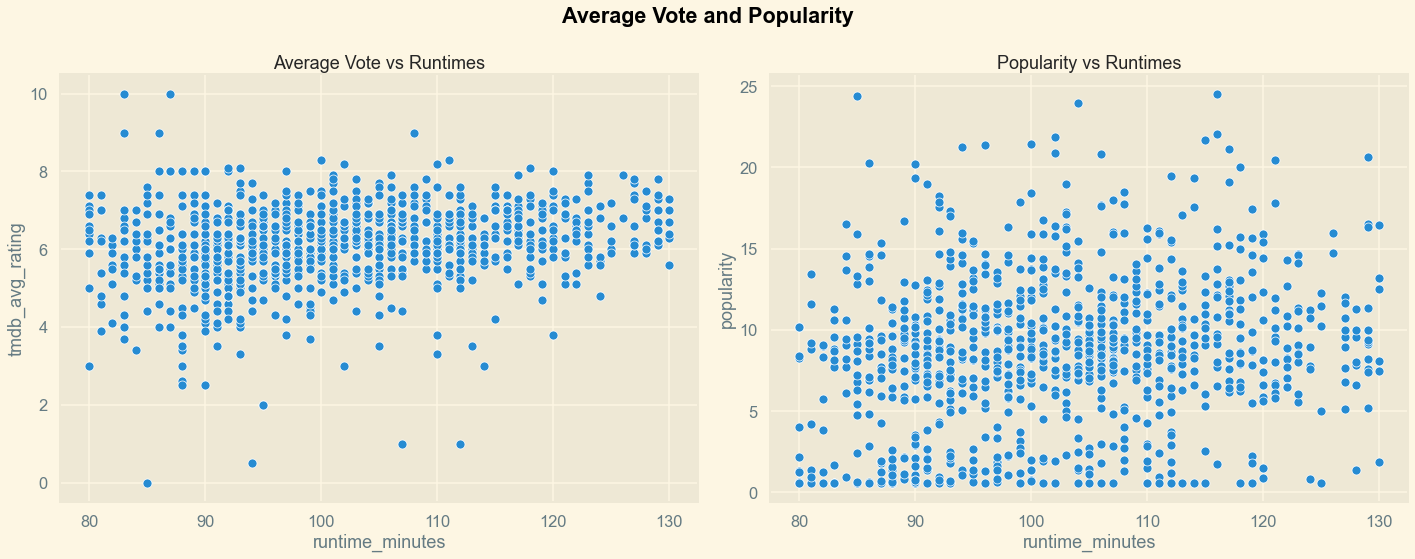

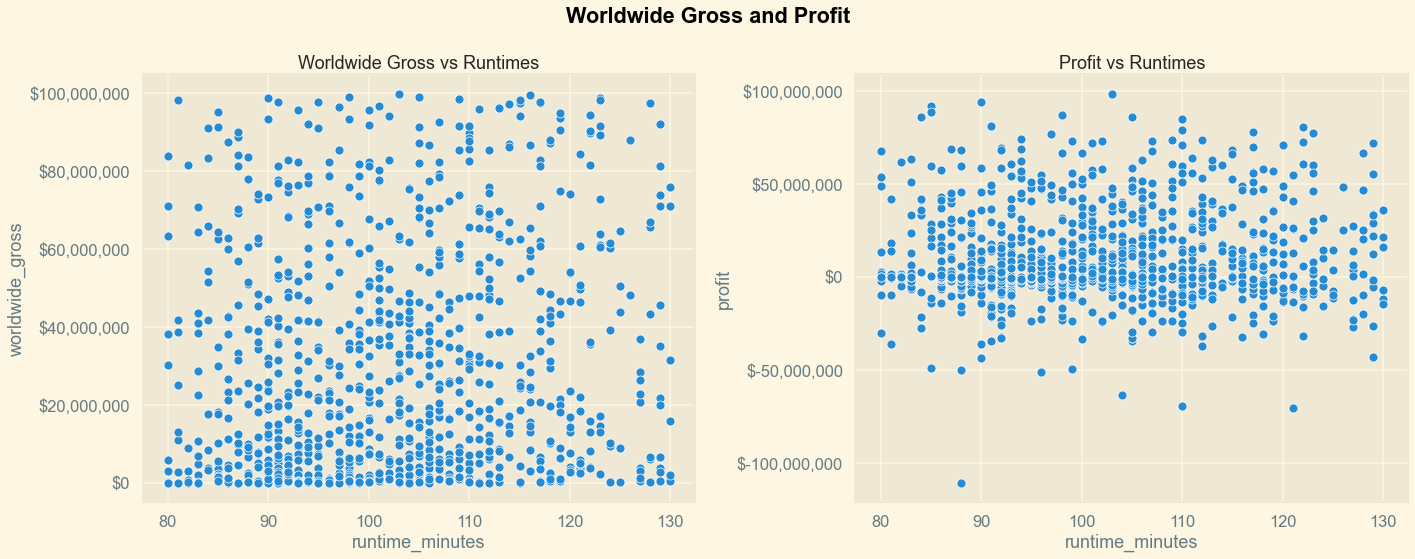

In [346]:
# create df including only movies whose worldwide gross is less than 100 million
df_run_trunc = df_run_trunc.loc[df_run_trunc['worldwide_gross'] < 100000000]

# remove the outliers on either side of runtime to get a clearer picture
df_run_trunc = df_run_trunc[(df_run_trunc['runtime_minutes'] >= 80) & 
                      (df_run_trunc['runtime_minutes'] <= 130) &
                      (df_run_trunc['popularity'] <= 25)]

# plot vote and popularity graphs
scatterplot_compare(df_run_trunc, 
                    'runtime_minutes', 'tmdb_avg_rating', 'Average Vote vs Runtimes',
                    'runtime_minutes', 'popularity', 'Popularity vs Runtimes',
                    'Average Vote and Popularity')

# plot Gross and Profit graphs
scatterplot_compare_dollars(df_run_trunc, 'runtime_minutes', 'worldwide_gross', 
                    'Worldwide Gross vs Runtimes',
                    'runtime_minutes', 'profit', 'Profit vs Runtimes',
                    'Worldwide Gross and Profit')

### Online Ratings to Financial Success Modeling

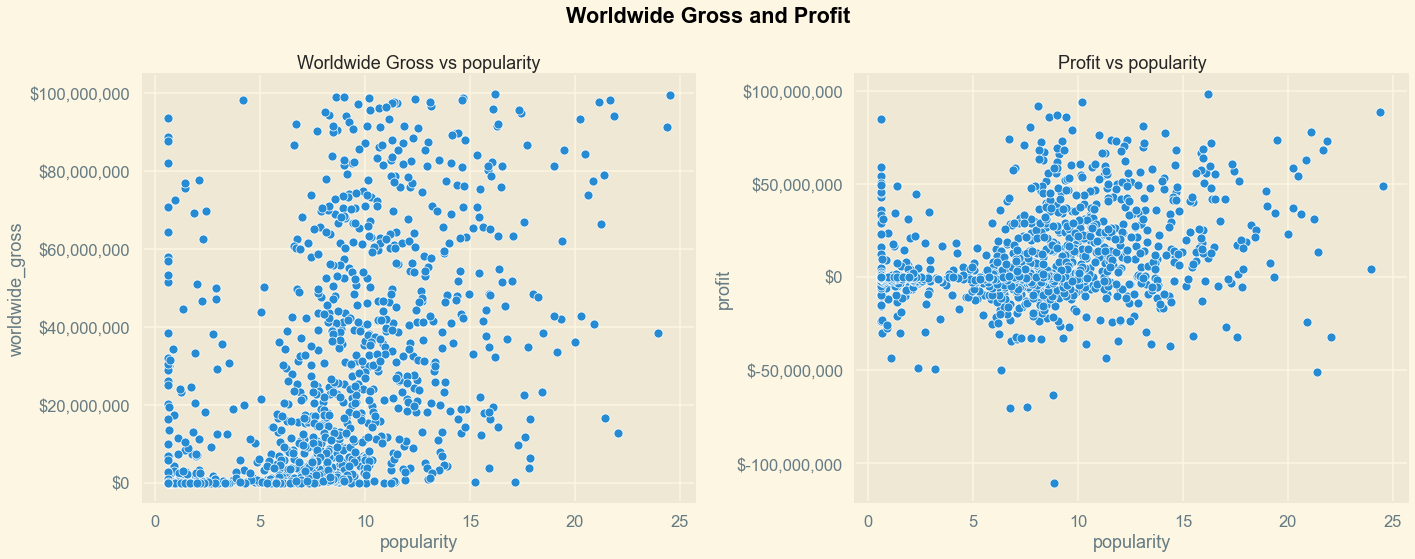

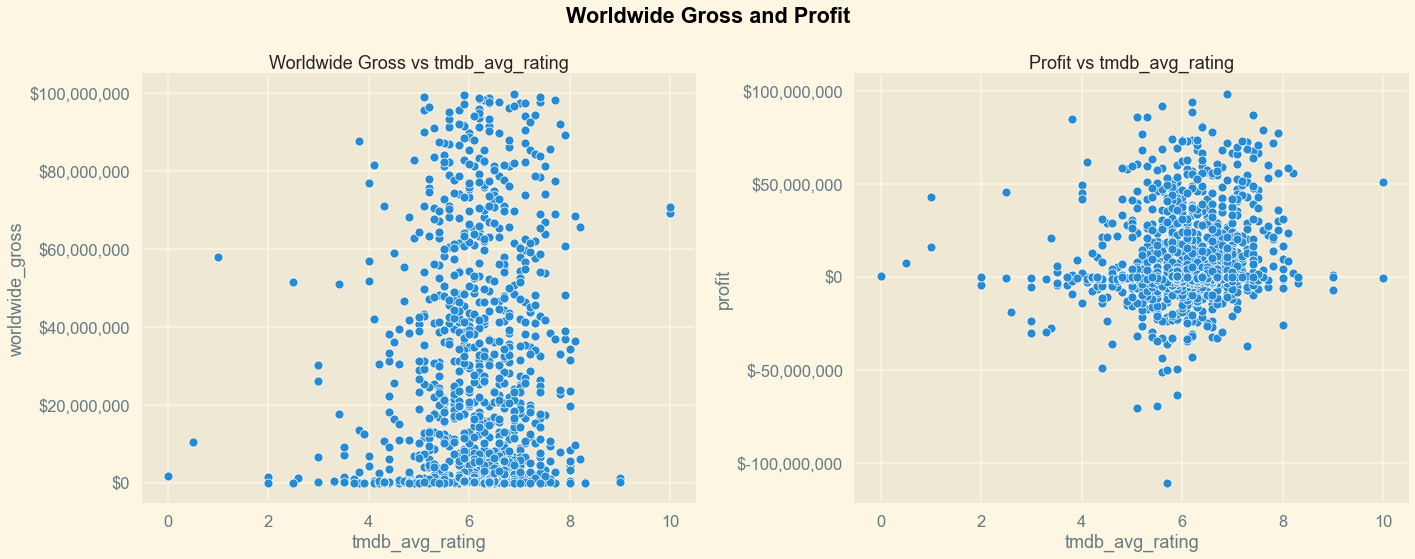

In [360]:
scatterplot_compare_dollars(df_run_trunc, 'popularity', 'worldwide_gross', 
                    'Worldwide Gross vs popularity',
                    'popularity', 'profit', 'Profit vs popularity',
                    'Worldwide Gross and Profit')

scatterplot_compare_dollars(df_run_trunc, 'tmdb_avg_rating', 'worldwide_gross', 
                    'Worldwide Gross vs tmdb_avg_rating',
                    'tmdb_avg_rating', 'profit', 'Profit vs tmdb_avg_rating',
                    'Worldwide Gross and Profit')

## Evaluation
The analysis done here sheds light on how movies in certain genres perform and also the basics of how long a movie should be as well as how important audience engagement is.

I am confident that this direction will provide a good footing to start off a company in a big industry like movies.

I do think that overall I would have liked to find more specific suggestions and that is something that can be done with further research and more data.
***

## Conclusions
This analysis leads to 3 recommendations for getting started as a movie company:
1. Even though the highest grossing movies by far are Action and Adventure that seems like a gamble to jump in to.  So start medium or small.
2.  When we look at the profit graph it shows comedy and drama as not very far behind action and adventure.  Action and Adventure movies are usually high budget and can be time consuming because of effects/fight choreography/safety.  Focus on the next two, Comedy and Drama, projects.  These genres are typically low production budget and Comedies don't depend on stars as much as larger action and adventure movies.
3. We saw that horror actually had the highest average profit and by the same principle as above, pursuing good projects in that genre would have low production budgets.

***
Further analysis into production timelines per genre could produce even more cost effective methods of starting out.

Lastly I wanted to investigate the external revenues generated by certain genres such as action figures, toys, alternate media.  That value would be useful in the long run.
***